In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [3]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
y_pred = kmeans.predict(X)

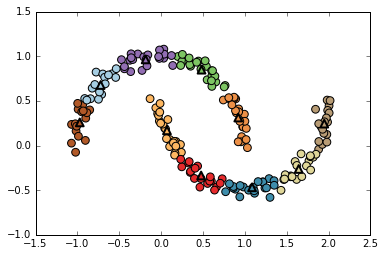

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='^', c=range(kmeans.n_clusters), s=60, linewidth=2, cmap='Paired')


In [7]:
from sklearn.linear_model import ridge_regression as rr
from sklearn.cross_validation import train_test_split as tts

In [16]:
X_new = pd.DataFrame(X)
X_new['clusters'] = y_pred.astype(str)
X_new = pd.get_dummies(X_new)
#X_new['y'] = y

In [18]:
X_train, X_test, y_train, y_test = tts(X_new, y, test_size=.2, random_state = 9840)

In [25]:
ypreds1 = lr(random_state=9840).fit(X_train[[0,1]], y_train).predict(X_test[[0,1]])
ypreds2 = lr(random_state=9840).fit(X_train, y_train).predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print (accuracy_score(ypreds1, y_test), accuracy_score(ypreds2, y_test))

0.85 1.0


In [30]:
ypreds3 = lr(random_state=9840).fit(X_new, y).predict(X_new)
XX = pd.DataFrame(X)
XX['preds'] = ypreds3

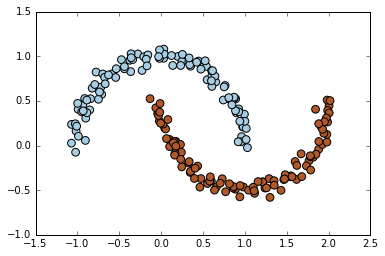

In [32]:
plt.scatter(XX.loc[:, 0], XX.loc[:, 1], c=ypreds3, s=60, cmap='Paired')